In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [65]:
O3_all = pd.read_csv("../Data/real_events_O3_ALL.csv")
O4_all = pd.read_csv("../Data/real_events_O4_ALL.csv")

In [66]:
keep = ["chirp_mass", "combined_far", "mass1", "mass2", "snr", "spin1z", "spin2z", "coalescence_phase", "template_duration"]
O3_all_reduced = O3_all[keep]
O4_all_reduced = O4_all[keep]
# Removed : none

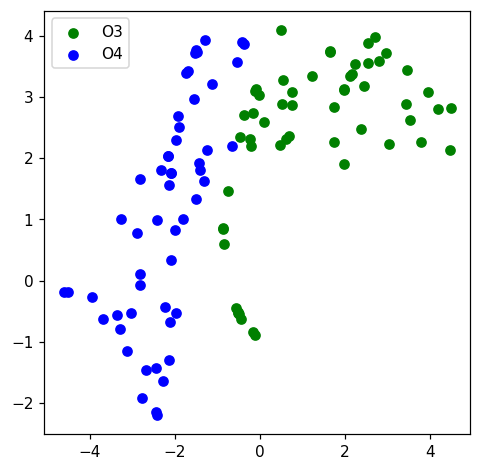

In [67]:
# Creating the TSNE algorithm :
tsne_O3 = TSNE(n_components=2, random_state=42)

# The random_state argument is a seed for the random number generator (?)
# Setting random_state to a fixed value allows for reproducability (?)

# Applying the O3 data to the TSNE algorithm created : 
X_tsne_O3 = tsne_O3.fit_transform(O3_all_reduced)

# This creates a 2 - dimensional df that will later be used for plotting

tsne_O4 = TSNE(n_components=2, random_state=42)
X_tsne_O4 = tsne_O4.fit_transform(O4_all_reduced)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

scatter_O3 = ax.scatter(X_tsne_O3[:, 0], X_tsne_O3[:, 1],color = "green", label="O3")

scatter_O4 = ax.scatter(X_tsne_O4[:, 0], X_tsne_O4[:, 1], color = "blue",label="O4")


ax.legend()
plt.show()

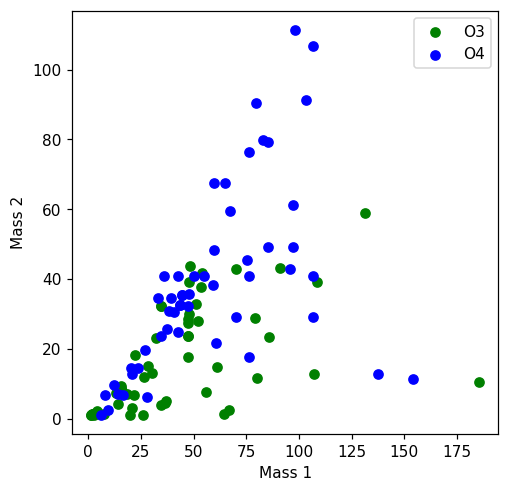

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
ax.scatter(O3_all["mass1"], O3_all["mass2"], color = "green", label = "O3")
ax.scatter(O4_all["mass1"], O4_all["mass2"], color = "blue", label = "O4")
ax.set_xlabel("Mass 1")
ax.set_ylabel("Mass 2")
ax.legend()

In [69]:
tsne_O3 = TSNE(perplexity = 5,n_components=2, random_state=42)
o3_NeutronStar = (O3_all_reduced[O3_all_reduced["template_duration"] >= 30])
o3_BlackHole = (O3_all_reduced[O3_all_reduced["template_duration"] < 30])
X_tsne_O3_NeutronStar = tsne_O3.fit_transform(o3_NeutronStar)
X_tsne_O3_BlackHole = tsne_O3.fit_transform(o3_BlackHole)

tsne_O4 = TSNE(perplexity = 5,n_components=2, random_state=42)
o4_NeutronStar = (O4_all_reduced[O4_all_reduced["template_duration"] >= 30])
o4_BlackHole = (O4_all_reduced[O4_all_reduced["template_duration"] < 30])
X_tsne_O4_NeutroStar = tsne_O4.fit_transform(o4_NeutronStar)
X_tsne_O4_BlackHole = tsne_O4.fit_transform(o4_BlackHole)

# scatter_O3 = ax.scatter(X_tsne_O3_NeutronStar[:, 0], X_tsne_O3_NeutronStar[:, 1],color = "green", label="O3 Neutron Star")
# scatter_O3 = ax.scatter(X_tsne_O3_BlackHole[:, 0], X_tsne_O3_BlackHole[:, 1],color = "blue", label="O3 Black Hole")

# scatter_O4 = ax.scatter(X_tsne_O4_NeutroStar[:, 0], X_tsne_O4_NeutroStar[:, 1], color = "red",label="O4 Neutron Star")
# scatter_O4 = ax.scatter(X_tsne_O4_BlackHole[:, 0], X_tsne_O4_BlackHole[:, 1], color = "orange",label="O4 Black Hole")


ax.legend()
plt.show()

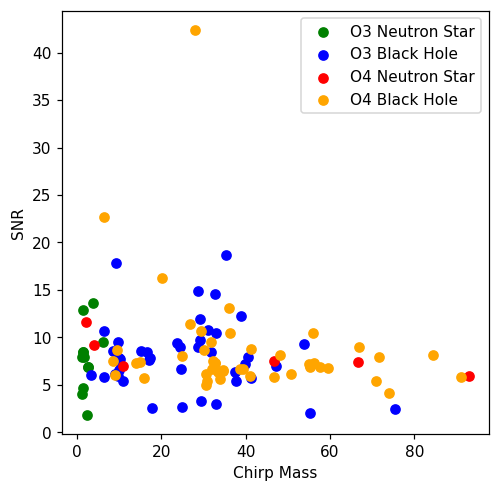

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)
# ax.scatter(o3_NeutronStar["mass1"] + o3_NeutronStar["mass2"],o3_NeutronStar['snr'], color = "green", label = "O3 Neutron Star")
# ax.scatter(o3_BlackHole["mass1"] + o3_BlackHole["mass2"], o3_BlackHole['snr'], color = "blue", label = "O3 Black Hole")
# ax.scatter(o4_NeutronStar["mass1"] + o4_NeutronStar["mass2"], o4_NeutronStar['snr'], color = "red", label = "O4 Neutron Star")
# ax.scatter(o4_BlackHole["mass1"] + o4_BlackHole["mass2"], o4_BlackHole['snr'], color = "orange", label = "O4 Black Hole")
x_val = "chirp_mass"
y_val = "snr"

ax.scatter(o3_NeutronStar[x_val],o3_NeutronStar[y_val], color = "green", label = "O3 Neutron Star")
ax.scatter(o3_BlackHole[x_val], o3_BlackHole[y_val], color = "blue", label = "O3 Black Hole")
ax.scatter(o4_NeutronStar[x_val], o4_NeutronStar[y_val], color = "red", label = "O4 Neutron Star")
ax.scatter(o4_BlackHole[x_val], o4_BlackHole[y_val], color = "orange", label = "O4 Black Hole") 

################
# samples = [o3_NeutronStar,o3_BlackHole,o4_NeutronStar,o4_BlackHole]
# for sample in samples:
#     KM = KMeans(n_clusters=1)
#     KM.fit(sample[x_val])
#     centroids = KM.cluster_centers_

#     for ind,i in enumerate(centroids):
#         class_inds=np.where(KM.labels_==ind)[0]
#         max_dist=np.max(metrics.pairwise_distances(i, sample[class_inds]))
#         print(max_dist)
#         plt.gca().add_artist(plt.Circle(i, max_dist, fill=False))
#     plt.show()
################

#ax.set_xlabel("Mass 1 + Mass 2")
ax.set_xlabel("Chirp Mass")
ax.set_ylabel("SNR")
ax.legend()

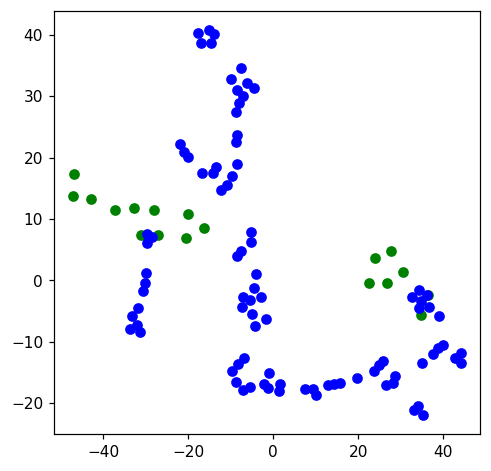

In [71]:
NeutronStar = pd.concat([o3_NeutronStar , o4_NeutronStar])
BlackHole = pd.concat([o3_BlackHole , o4_BlackHole])
NeutronStar_TSNE = (TSNE(perplexity = 5,n_components=2, random_state=42)).fit_transform(NeutronStar)
BlackHole_TSNE = (TSNE(perplexity = 5,n_components=2, random_state=42)).fit_transform(BlackHole)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

scatter_Neutron = ax.scatter(NeutronStar_TSNE[:, 0], NeutronStar_TSNE[:, 1],color = "green", label="Neutron Star")
scatter_BlackHole = ax.scatter(BlackHole_TSNE[:, 0], BlackHole_TSNE[:, 1],color = "Blue", label="Black Hole")

In [73]:
ax.scatter(scatter_BlackHole[x_val], scatter_BlackHole[y_val], color = "green", label = "Black Hole")
ax.scatter(scatter_Neutron[x_val], scatter_Neutron[y_val], color = "blue", label = "Neutron Star")

ax.set_xlabel("Chirp Mass")
ax.set_ylabel("SNR")
ax.legend()

TypeError: 'PathCollection' object is not subscriptable

$$d_L = 45 \text{ Gpc} \left( \frac{\text{Hz}}{f_{\text{GW}\mid_{\text{max}}}}\right)\left( \frac{10^{-21}}{h\mid_{\text{max}}}\right)$$

Above is the formula for luminosity distance given in https://arxiv.org/pdf/1608.01940.pdf (equation 22). We can get the max frequency but I don't know how we'd find the maximum strain. Would we have to take it off a plot? It doesn't seem to be given in the GraceDB data.

$$\chi_{\text{eff}} = \frac{\vec{S_1}/m_1+\vec{S_2}/m_2}{m_1+m_2} \cdot \hat{L}$$

In [ ]:
# Example of how this would be coded (for each row in a dataframe)... would need to update this... still dependent on previous code
def x_eff(dataframe):
    for x in range(len(dataframe)):
        x_eff_vals = ((dataframe.at[x, "spin1z"] / dataframe.at[x, "mass1"]) + (dataframe.at[x, "spin2z"] / dataframe.at[x, "mass2"])) / ((dataframe.at[x, "mass1"]) + (dataframe.at[x, "mass2"]))
        dataframe.at[x, 'x_eff'] = x_eff_vals